
Training with Learning Rate: 0.05
Epoch 0, Loss: 0.4999759864363229
Epoch 1000, Loss: 0.1824595795805291
Epoch 2000, Loss: 0.1272708106621207

Training with Learning Rate: 0.1
Epoch 0, Loss: 0.4999759864363229
Epoch 1000, Loss: 0.09369026904212674

Training with Learning Rate: 0.15000000000000002
Epoch 0, Loss: 0.4999759864363229

Training with Learning Rate: 0.2
Epoch 0, Loss: 0.4999759864363229

Training with Learning Rate: 0.25
Epoch 0, Loss: 0.4999759864363229
Epoch 1000, Loss: 0.08437945145479091
Epoch 2000, Loss: 0.07568013794448536
Epoch 3000, Loss: 0.07270480800599406
Epoch 4000, Loss: 0.07108734174316304
Epoch 5000, Loss: 0.07003771801295128
Epoch 6000, Loss: 0.06928787245313156
Epoch 7000, Loss: 0.06871861016295165
Epoch 8000, Loss: 0.0682678856695187
Epoch 9000, Loss: 0.0678998370764015

Training with Learning Rate: 0.30000000000000004
Epoch 0, Loss: 0.4999759864363229

Training with Learning Rate: 0.35000000000000003
Epoch 0, Loss: 0.4999759864363229

Training with Learnin

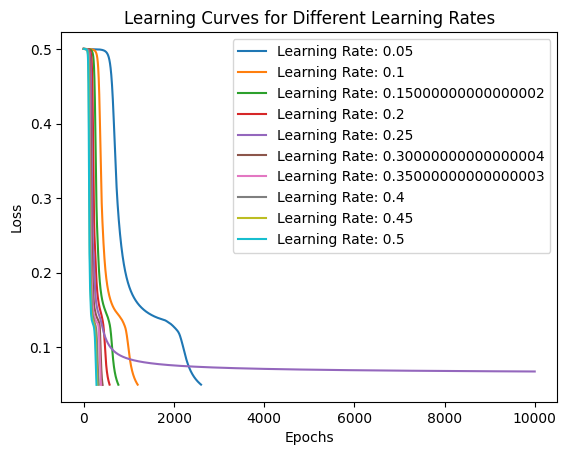

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function for neuron output
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function used in backpropagation
def sigmoid_derivative(output):
    return output * (1 - output)

# Function to generate the 4-bit parity dataset
def create_parity_dataset():
    # 4-bit binary inputs (all possible combinations)
    input_data = np.array([[0, 0, 0, 0],
                           [0, 0, 0, 1],
                           [0, 0, 1, 0],
                           [0, 0, 1, 1],
                           [0, 1, 0, 0],
                           [0, 1, 0, 1],
                           [0, 1, 1, 0],
                           [0, 1, 1, 1],
                           [1, 0, 0, 0],
                           [1, 0, 0, 1],
                           [1, 0, 1, 0],
                           [1, 0, 1, 1],
                           [1, 1, 0, 0],
                           [1, 1, 0, 1],
                           [1, 1, 1, 0],
                           [1, 1, 1, 1]])

    # Expected output: 1 if there's an odd number of 1's, otherwise 0
    target_output = np.array([[0], [1], [1], [0], [1], [0], [0], [1],
                              [1], [0], [0], [1], [0], [1], [1], [0]])
    
    return input_data, target_output

# Two-layer perceptron with momentum and backpropagation
class NeuralNetwork:
    def __init__(self, num_inputs, num_hidden, num_outputs, learning_rate, momentum):
        np.random.seed(42)  # Reproducibility

        # Layer sizes
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        self.learning_rate = learning_rate
        self.momentum = momentum
        
        # Initialize weights and biases between -1 and 1
        self.weights_input_hidden = np.random.uniform(-1, 1, (num_inputs, num_hidden))
        self.weights_hidden_output = np.random.uniform(-1, 1, (num_hidden, num_outputs))
        self.bias_hidden = np.random.uniform(-1, 1, (1, num_hidden))
        self.bias_output = np.random.uniform(-1, 1, (1, num_outputs))
        
        # Momentum initialization for weights and biases
        self.momentum_input_hidden = np.zeros(self.weights_input_hidden.shape)
        self.momentum_hidden_output = np.zeros(self.weights_hidden_output.shape)
        self.momentum_bias_hidden = np.zeros(self.bias_hidden.shape)
        self.momentum_bias_output = np.zeros(self.bias_output.shape)

    def forward_propagation(self, inputs):
        # Hidden layer computations
        hidden_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        hidden_output = sigmoid_function(hidden_input)
        
        # Output layer computations
        final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        final_output = sigmoid_function(final_input)
        
        return final_output, hidden_output

    def backward_propagation(self, inputs, targets, final_output, hidden_output):
        # Error in output layer
        output_error = targets - final_output
        output_delta = output_error * sigmoid_derivative(final_output)
        
        # Error in hidden layer
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_output)
        
        # Momentum and weight updates
        self.momentum_hidden_output = (self.momentum * self.momentum_hidden_output + 
                                       self.learning_rate * np.dot(hidden_output.T, output_delta))
        self.weights_hidden_output += self.momentum_hidden_output
        
        self.momentum_input_hidden = (self.momentum * self.momentum_input_hidden + 
                                      self.learning_rate * np.dot(inputs.T, hidden_delta))
        self.weights_input_hidden += self.momentum_input_hidden
        
        # Bias updates
        self.momentum_bias_output = (self.momentum * self.momentum_bias_output + 
                                     self.learning_rate * np.sum(output_delta, axis=0, keepdims=True))
        self.bias_output += self.momentum_bias_output
        
        self.momentum_bias_hidden = (self.momentum * self.momentum_bias_hidden + 
                                     self.learning_rate * np.sum(hidden_delta, axis=0, keepdims=True))
        self.bias_hidden += self.momentum_bias_hidden

    def train(self, inputs, targets, max_epochs=10000, error_threshold=0.05):
        epoch_losses = []
        epochs_needed = 0
        for epoch in range(max_epochs):
            final_output, hidden_output = self.forward_propagation(inputs)
            self.backward_propagation(inputs, targets, final_output, hidden_output)
            
            # Mean absolute error
            loss = np.mean(np.abs(targets - final_output))
            epoch_losses.append(loss)
            
            # Output progress every 1000 epochs
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")
            
            # Stop training if loss is below the threshold
            if loss < error_threshold:
                epochs_needed = epoch
                break
        
        return epoch_losses, epochs_needed

# Plot the learning curves for various learning rates
def plot_learning_curves(learning_rates, losses_per_rate):
    for rate, losses in zip(learning_rates, losses_per_rate):
        plt.plot(losses, label=f'Learning Rate: {rate}')
    plt.title('Learning Curves for Different Learning Rates')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Main function to train and analyze the perceptron with different learning rates
if __name__ == "__main__":
    # Generate the parity problem dataset
    inputs, targets = create_parity_dataset()
    
    # Neural network settings
    input_size = 4
    hidden_size = 4
    output_size = 1
    momentum_value = 0.9
    
    # Test a range of learning rates
    learning_rate_values = np.arange(0.05, 0.55, 0.05)
    all_losses = []
    epochs_for_each_rate = []
    
    for learning_rate in learning_rate_values:
        print(f"\nTraining with Learning Rate: {learning_rate}")
        
        # Create a new network instance for each learning rate
        network = NeuralNetwork(input_size, hidden_size, output_size, learning_rate, momentum_value)
        
        # Train the network and collect the losses
        losses, epochs = network.train(inputs, targets)
        all_losses.append(losses)
        epochs_for_each_rate.append(epochs)
    
    # Print the number of epochs for each learning rate
    for rate, epochs in zip(learning_rate_values, epochs_for_each_rate):
        print(f"Learning Rate: {rate}, Epochs to Convergence: {epochs}")
    
    # Plot the learning curves
    plot_learning_curves(learning_rate_values, all_losses)


# Two-Layer Perceptron with Backpropagation and Momentum

This notebook implements a two-layer perceptron with backpropagation to solve the parity problem. The network is trained using different learning rates (`η`) and includes a momentum term (`β = 0.9`) to improve convergence speed.

## Problem Definition
The goal is to classify 4-bit binary inputs based on whether they contain an odd or even number of 1's. If the input has an odd number of 1's, the target output is `1`, and if it has an even number, the target output is `0`.

### Neural Network Architecture
- **Input layer**: 4 binary input nodes.
- **Hidden layer**: 4 hidden units with sigmoid activation.
- **Output layer**: 1 output node with sigmoid activation.

### Stopping Criterion
Training is stopped when the mean absolute error falls below `0.05`.

---

## Varying the Learning Rate (η)

In this section, we vary the value of `η` from `0.05` to `0.5` with an increment of `0.05`. The plot below shows how different learning rates influence the convergence of the model.

### Results:
- For smaller learning rates (`η = 0.05`, `0.1`), the network converges slowly but steadily.
- Learning rates above `0.25` struggle to converge within the error threshold, with larger rates oscillating or taking longer.
- Optimal learning rates for this model appear to be between `0.2` and `0.25`.

---

## Effect of Momentum (β = 0.9)

Momentum (`β = 0.9`) is included in the weight update to accelerate convergence and avoid oscillations. The plot shows how the learning curves behave with momentum applied across various learning rates.

### Results:
- Momentum helps the network avoid local minima and smoothens weight updates, especially for smaller learning rates.
- It is particularly effective when learning rates are in the middle range (`η = 0.2` to `0.25`), significantly speeding up convergence.
